## Import packages

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import json
from google.colab import drive
from pandas.io.json import json_normalize
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
path='/gdrive/My Drive/datasets/football/'

## Read the data (statsbomb)

In [0]:
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]
print(json_files) 

['7298.json', '7430.json', '7443.json', '7444.json', '7445.json', '7451.json', '7456.json', '7457.json', '7471.json', '7472.json', '7473.json', '7474.json', '7475.json', '7476.json', '7477.json', '7478.json', '7479.json', '7480.json', '7482.json', '7483.json', '7484.json', '7485.json', '7486.json', '7487.json', '7490.json', '7492.json', '7493.json', '7494.json', '7496.json', '7497.json', '7500.json', '7519.json', '7520.json', '7521.json', '7522.json', '7523.json', '7524.json', '7525.json', '7529.json', '7530.json', '7531.json', '7532.json', '7533.json', '7534.json', '7535.json', '7536.json', '7537.json', '7538.json', '7539.json', '7540.json', '7541.json', '7542.json', '7543.json', '7544.json', '7545.json', '7546.json', '7547.json', '7548.json', '7549.json', '7550.json', '7551.json', '7552.json', '7553.json', '7554.json', '7555.json', '7556.json', '7557.json', '7558.json', '7559.json', '7560.json', '7561.json', '7562.json', '7563.json', '7564.json', '7565.json', '7566.json', '7567.json'

In [0]:
ef=pd.DataFrame()
ef

""


In [0]:
for i in json_files:
  with open(path+i) as data_file:    
    data = json.load(data_file)
    df = json_normalize(data, sep = "_")
    df=df[df.type_name=="Shot"]
    frames = [ef, df]
    ef = pd.concat(frames)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [0]:
ef

,id,index,period,timestamp,minute,second,possession,off_camera,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,...,foul_committed_card_id,foul_committed_card_name,pass_technique_id,pass_technique_name,pass_miscommunication,foul_won_penalty,block_save_block,block_offensive,50_50_outcome_id,50_50_outcome_name,miscontrol_aerial_won,shot_redirect,foul_committed_penalty,out,clearance_left_foot,clearance_body_part_id,clearance_body_part_name,clearance_head,clearance_right_foot,pass_straight,pass_outswinging,pass_inswinging,goalkeeper_punched_out,goalkeeper_lost_out,half_start_late_video_start,clearance_other,pass_no_touch,shot_saved_off_target,goalkeeper_shot_saved_off_target,dribble_no_touch,shot_saved_to_post,goalkeeper_shot_saved_to_post,player_off_permanent,goalkeeper_lost_in_play,goalkeeper_success_out,goalkeeper_success_in_play,shot_kick_off,goalkeeper_penalty_saved_to_post,half_end_early_video_end,goalkeeper_saved_to_post
33,61149bb7-bd43-4260-a0f9-7e058eaad3ce,34,1,00:00:47.620,0,47,4,False,0.560000,16,Shot,971,Chelsea LFC,1,Regular Play,971,Chelsea LFC,NaN,NaN,"[542ffba6-f09e-467d-9109-d4df13f867cf, b652219...","[115.0, 25.0]",4641.0,Francesca Kirby,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,460b9863-46f1-41d0-925e-73d9d677b4d4,187,1,00:05:12.780,5,12,17,False,0.400000,16,Shot,971,Chelsea LFC,4,From Throw In,971,Chelsea LFC,NaN,NaN,"[3f2b17f4-ae95-4c02-b30f-5766d78fdac4, 4bd584d...","[109.0, 51.0]",4641.0,Francesca Kirby,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,4904fe79-34c9-4a77-9b88-70ddf43d2f00,193,1,00:05:41.940,5,41,18,False,0.480000,16,Shot,971,Chelsea LFC,2,From Corner,971,Chelsea LFC,NaN,NaN,"[51a7e445-c3c3-4533-8417-20c28d6f863b, d573c6f...","[99.0, 52.0]",4647.0,So-yun Ji,14.0,Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,367a07f8-060e-4f7a-833c-f80b12c0e751,197,1,00:05:43.900,5,43,18,False,0.160000,16,Shot,971,Chelsea LFC,2,From Corner,971,Chelsea LFC,NaN,NaN,"[3ceffb6f-a466-4b9b-87ef-4513adaeb1c2, c2ab93c...","[107.0, 40.0]",4638.0,Drew Spence,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,a905bf03-944d-4fdf-9313-798566db000d,205,1,00:05:46.380,5,46,18,False,1.480000,16,Shot,971,Chelsea LFC,2,From Corner,971,Chelsea LFC,NaN,NaN,"[0dd4ef1c-7173-4cb7-b3bd-304b16a69177, 3e0fdbb...","[108.0, 32.0]",4642.0,Millie Bright,3.0,Right Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Pickle shots only data for easy later invocation

In [0]:
ef.to_pickle(path+"shot_data")

In [0]:
for i in ef.columns:
  print(i)

id
index
period
timestamp
minute
second
possession
off_camera
duration
type_id
type_name
possession_team_id
possession_team_name
play_pattern_id
play_pattern_name
team_id
team_name
tactics_formation
tactics_lineup
related_events
location
player_id
player_name
position_id
position_name
pass_recipient_id
pass_recipient_name
pass_length
pass_angle
pass_height_id
pass_height_name
pass_end_location
pass_type_id
pass_type_name
pass_body_part_id
pass_body_part_name
under_pressure
pass_outcome_id
pass_outcome_name
ball_receipt_outcome_id
ball_receipt_outcome_name
pass_assisted_shot_id
pass_shot_assist
pass_through_ball
dribble_outcome_id
dribble_outcome_name
shot_statsbomb_xg
shot_end_location
shot_key_pass_id
shot_follows_dribble
shot_outcome_id
shot_outcome_name
shot_type_id
shot_type_name
shot_technique_id
shot_technique_name
shot_body_part_id
shot_body_part_name
shot_freeze_frame
goalkeeper_type_id
goalkeeper_type_name
goalkeeper_position_id
goalkeeper_position_name
pass_cross
duel_outcome

In [0]:
import pandas as pd
ef=pd.read_pickle(path+"shot_data")

## Draw half-pitch for plotting

In [0]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([40,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([85.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([95.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((40,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((40,40),0.71,color="black")
    rightPenSpot = plt.Circle((90.3,40),0.71,color="black")
    rightArc = Arc((90.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

## Plot shot freezeframe

In [0]:
def plot_freeze_frame(frame,shot):
  loc_same=[]
  loc_opp=[]
  for i in frame:
    if i['teammate']==True:
      loc_same.append(i['location'])
    else:
      loc_opp.append(i['location'])
  fig=plt.figure()
  fig.set_size_inches(5, 5)
  ax=fig.add_subplot(1,1,1)
  draw_half_pitch(ax)
  plt.axis('off')
  x_coord_same = [i[0]-20 for i in loc_same]
  y_coord_same = [i[1] for i in loc_same]
  x_coord_opp = [i[0]-20 for i in loc_opp]
  y_coord_opp = [i[1] for i in loc_opp]
  ax.scatter(x_coord_same, y_coord_same, c = 'blue', label = 'same team players')
  ax.scatter(x_coord_opp, y_coord_opp, c = 'green', label = 'oppenent team players')
  ax.scatter(shot[0]-20, shot[1], c = 'red', label = 'shooter')

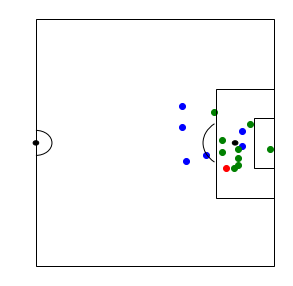

In [0]:
shot=ef.location.iloc[4]
frame=ef.shot_freeze_frame.iloc[4]
plot_freeze_frame(frame,shot)

## Feature Engineering

In [0]:
ef[ef.shot_type_name=="Free Kick"]["shot_outcome_name"]

925       Off T
987     Blocked
2466      Saved
2159      Off T
2271      Off T
         ...   
2265       Goal
1919      Off T
2296    Blocked
2038    Blocked
2195      Off T
Name: shot_outcome_name, Length: 1171, dtype: object

In [0]:
ef = ef.dropna(axis=0, subset=['shot_statsbomb_xg'])

In [0]:
df=ef[["location","shot_statsbomb_xg","shot_end_location","shot_type_name","shot_technique_name","shot_body_part_name","shot_first_time","shot_one_on_one","shot_open_goal","shot_outcome_name"]]

In [0]:
df.head()

,location,shot_statsbomb_xg,shot_end_location,shot_type_name,shot_technique_name,shot_body_part_name,shot_first_time,shot_one_on_one,shot_open_goal,shot_outcome_name
33,"[115.0, 25.0]",0.123623,"[117.0, 34.0, 0.0]",Open Play,Normal,Right Foot,NaN,NaN,NaN,Blocked
186,"[109.0, 51.0]",0.059487,"[112.0, 44.0, 0.0]",Open Play,Normal,Left Foot,NaN,NaN,NaN,Blocked
192,"[99.0, 52.0]",0.024417,"[108.0, 51.0, 0.0]",Open Play,Half Volley,Right Foot,True,NaN,NaN,Blocked
196,"[107.0, 40.0]",0.113025,"[112.0, 37.0, 0.0]",Open Play,Normal,Right Foot,NaN,NaN,NaN,Blocked
204,"[108.0, 32.0]",0.081086,"[120.0, 42.9, 1.9]",Open Play,Normal,Left Foot,True,NaN,NaN,Goal


In [0]:
df.isnull().sum()

location                   0
shot_statsbomb_xg          1
shot_end_location          0
shot_type_name             0
shot_technique_name        0
shot_body_part_name        0
shot_first_time        15141
shot_one_on_one        19357
shot_open_goal         20400
shot_outcome_name          0
dtype: int64

In [0]:
len(df)

20643

In [0]:
df = df.dropna(axis=0, subset=['shot_statsbomb_xg'])

In [0]:
df=df.fillna("False")

In [0]:
df[['location_x','location_y']] = pd.DataFrame(df.location.tolist(), index= df.index)


In [0]:
len(df)

20642

In [0]:
for index, row in df.iterrows():
  if(len(row['shot_end_location']))==2:
    row['shot_end_location'].append(0.0)
    

In [0]:
df[['end_location_x','end_location_y','end_location_z']] = pd.DataFrame(df.shot_end_location.tolist(), index= df.index)

## Calculate distance between the goals

In [0]:
df['distance'] = np.sqrt((df.location_x - df.end_location_x) ** 2 + (df.location_y - df.end_location_y) ** 2)

In [0]:
xg_values=df.shot_statsbomb_xg
df=df.drop(['shot_end_location', 'location','shot_statsbomb_xg'], axis = 1) 

In [0]:
df.head()

,shot_type_name,shot_technique_name,shot_body_part_name,shot_first_time,shot_one_on_one,shot_open_goal,shot_outcome_name,location_x,location_y,end_location_x,end_location_y,end_location_z,distance
33,Open Play,Normal,Right Foot,False,False,False,Blocked,115.0,25.0,117.0,34.0,0.0,9.219544
186,Open Play,Normal,Left Foot,False,False,False,Blocked,109.0,51.0,112.0,44.0,0.0,7.615773
192,Open Play,Half Volley,Right Foot,True,False,False,Blocked,99.0,52.0,108.0,51.0,0.0,9.055385
196,Open Play,Normal,Right Foot,False,False,False,Blocked,107.0,40.0,112.0,37.0,0.0,5.830952
204,Open Play,Normal,Left Foot,True,False,False,Goal,108.0,32.0,120.0,42.9,1.9,16.211416


In [0]:
outcome = [1 if i == "Goal" else 0 for i in df["shot_outcome_name"]]
df['shot_outcome_name']=outcome
#y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]

In [0]:
df.columns

Index(['shot_type_name', 'shot_technique_name', 'shot_body_part_name',
       'shot_first_time', 'shot_one_on_one', 'shot_open_goal',
       'shot_outcome_name', 'location_x', 'location_y', 'end_location_x',
       'end_location_y', 'end_location_z', 'distance'],
      dtype='object')

In [0]:
hf=df[['location_x', 'location_y','distance',
       'end_location_x', 'end_location_y', 'end_location_z','shot_outcome_name']]

In [0]:
hf.head()

,location_x,location_y,distance,end_location_x,end_location_y,end_location_z,shot_outcome_name
33,115.0,25.0,9.219544,117.0,34.0,0.0,0
186,109.0,51.0,7.615773,112.0,44.0,0.0,0
192,99.0,52.0,9.055385,108.0,51.0,0.0,0
196,107.0,40.0,5.830952,112.0,37.0,0.0,0
204,108.0,32.0,16.211416,120.0,42.9,1.9,1


## One hot encodng of categorical features

In [0]:
df = pd.get_dummies(df[['shot_type_name', 'shot_technique_name', 'shot_body_part_name',
       'shot_first_time', 'shot_one_on_one', 'shot_open_goal']])

In [0]:
df.head()

,shot_type_name_Corner,shot_type_name_Free Kick,shot_type_name_Kick Off,shot_type_name_Open Play,shot_type_name_Penalty,shot_technique_name_Backheel,shot_technique_name_Diving Header,shot_technique_name_Half Volley,shot_technique_name_Lob,shot_technique_name_Normal,shot_technique_name_Overhead Kick,shot_technique_name_Volley,shot_body_part_name_Head,shot_body_part_name_Left Foot,shot_body_part_name_Other,shot_body_part_name_Right Foot,shot_first_time_True,shot_first_time_False,shot_one_on_one_True,shot_one_on_one_False,shot_open_goal_True,shot_open_goal_False
33,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
186,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1
192,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1
196,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1
204,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1


In [0]:
df=pd.concat([df, hf], axis=1)

In [0]:
df.isnull().sum()

shot_type_name_Corner                0
shot_type_name_Free Kick             0
shot_type_name_Kick Off              0
shot_type_name_Open Play             0
shot_type_name_Penalty               0
shot_technique_name_Backheel         0
shot_technique_name_Diving Header    0
shot_technique_name_Half Volley      0
shot_technique_name_Lob              0
shot_technique_name_Normal           0
shot_technique_name_Overhead Kick    0
shot_technique_name_Volley           0
shot_body_part_name_Head             0
shot_body_part_name_Left Foot        0
shot_body_part_name_Other            0
shot_body_part_name_Right Foot       0
shot_first_time_True                 0
shot_first_time_False                0
shot_one_on_one_True                 0
shot_one_on_one_False                0
shot_open_goal_True                  0
shot_open_goal_False                 0
location_x                           0
location_y                           0
distance                             0
end_location_x           

In [0]:
df.head()

,shot_type_name_Corner,shot_type_name_Free Kick,shot_type_name_Kick Off,shot_type_name_Open Play,shot_type_name_Penalty,shot_technique_name_Backheel,shot_technique_name_Diving Header,shot_technique_name_Half Volley,shot_technique_name_Lob,shot_technique_name_Normal,shot_technique_name_Overhead Kick,shot_technique_name_Volley,shot_body_part_name_Head,shot_body_part_name_Left Foot,shot_body_part_name_Other,shot_body_part_name_Right Foot,shot_first_time_True,shot_first_time_False,shot_one_on_one_True,shot_one_on_one_False,shot_open_goal_True,shot_open_goal_False,location_x,location_y,distance,end_location_x,end_location_y,end_location_z,shot_outcome_name
33,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,115.0,25.0,9.219544,117.0,34.0,0.0,0
186,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,109.0,51.0,7.615773,112.0,44.0,0.0,0
192,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,99.0,52.0,9.055385,108.0,51.0,0.0,0
196,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,107.0,40.0,5.830952,112.0,37.0,0.0,0
204,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,108.0,32.0,16.211416,120.0,42.9,1.9,1


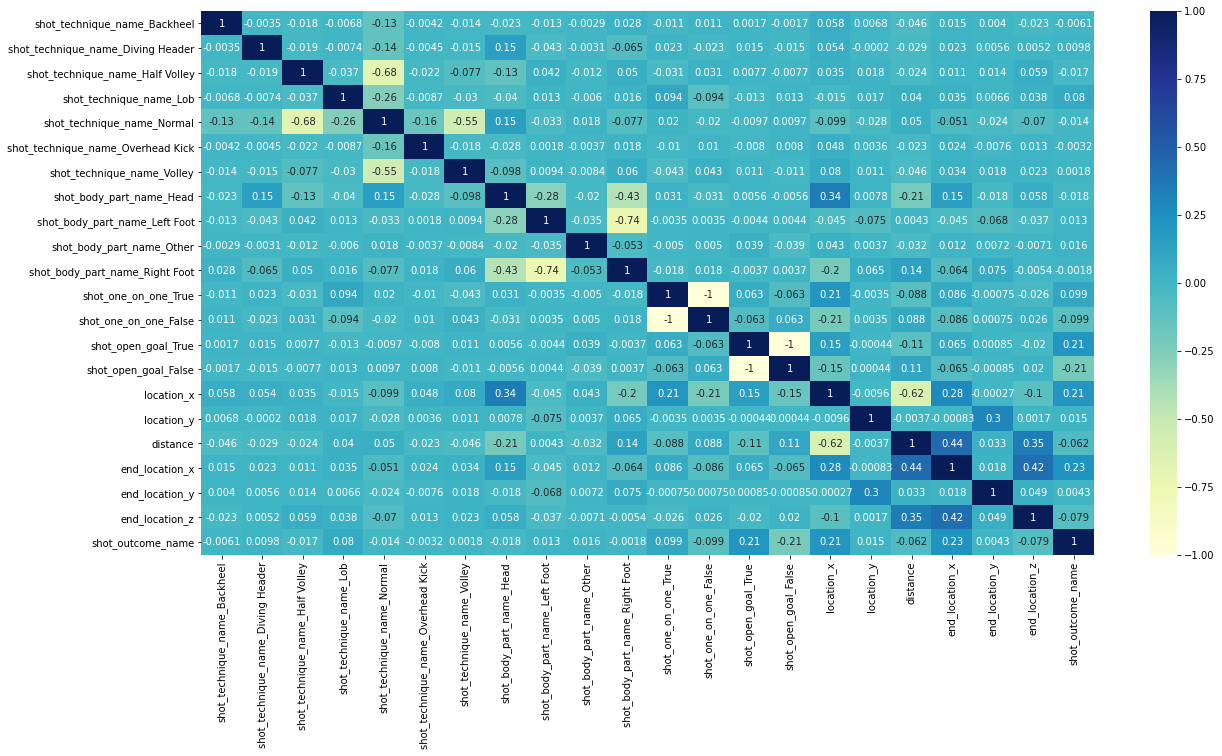

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu");

In [0]:
len(df.columns)

29

In [0]:
X = df.iloc[:, 0:28].values
y = df.iloc[:, 28].values

Scaling and PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X = pca.fit_transform(X)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
X[0]

array([-0.89215146, -1.52027804, -0.66441355,  0.17835005,  1.02162972,
       -0.48124366, -0.1118663 , -1.26937363,  0.15674699])

In [0]:
from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [0]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01,n_estimators=200,max_depth=4,subsample=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
y_pred_proba_xgb = model.predict_proba(X)[:,1]
y_pred=model.predict_proba(X)

In [0]:
y_pred_proba_xgb

array([0.1863057 , 0.06823804, 0.06827267, ..., 0.07059267, 0.5907775 ,
       0.17903784], dtype=float32)

In [0]:
xg_values.values

array([0.12362336, 0.05948667, 0.02441732, ..., 0.05580321, 0.459527  ,
       0.1598031 ])

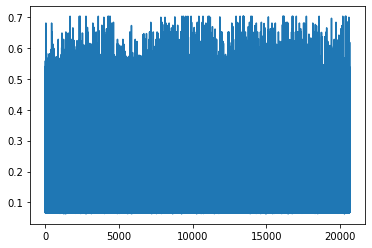

In [0]:
plt.plot(y_pred_proba_xgb) # plotting by columns
plt.show()

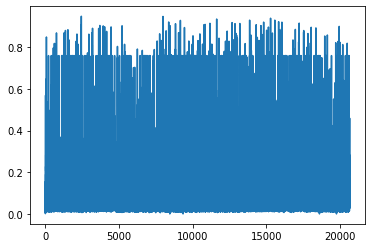

In [0]:
plt.plot(ef.shot_statsbomb_xg.values) # plotting by columns
plt.show()